<a href="https://colab.research.google.com/github/Hyunj5ng/machine-learning-practice/blob/main/4_7_automatically_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.7 automatically feature selection

## 4.7.1 single variable statistic

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 5.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=c1b8b12cefb8a5632f37bfe934330b4e60d8318b8c431713b40e7e3c445ae18a
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import sys
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython 
import sklearn
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif

cancer = load_breast_cancer()

# producing fixed random number 
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add the noise features in the data
#first 30 data are original features and next 50 data are noise.
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5
)

#select 50% of features with f_classif(default) and SelectPercentile
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train, y_train)
#apply to train set
X_train_selected = select.transform(X_train)

print("X_train.shape:", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x7f4cabb17a58>],
 <a list of 1 Text major ticklabel objects>)

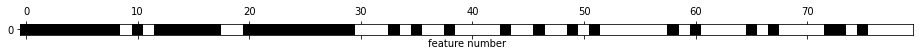

In [ ]:
mask = select.get_support()
print(mask)
#masking True to be black, False to be white
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])

In [ ]:
from sklearn.linear_model import LogisticRegression

# transform the test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("test score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("test score with selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)
))

test score with all features: 0.916
test score with selected features: 0.919


## 4.7.2 model based feature selection


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median"
)

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


([<matplotlib.axis.YTick at 0x7f4ca8afe2e8>],
 <a list of 1 Text major ticklabel objects>)

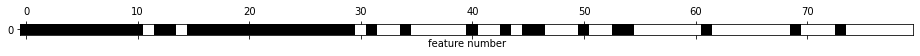

In [ ]:
mask = select.get_support()
#masking True to be black, False to be white
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])

In [ ]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("test score: {:.3f}".format(score))

test score: 0.930


## 4.7.3 Interative feature selection

([<matplotlib.axis.YTick at 0x7f4ca8b53080>],
 <a list of 1 Text major ticklabel objects>)

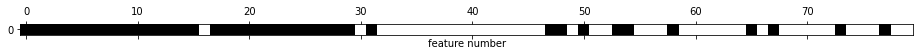

In [ ]:
# RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# show the selected features
#masking True to be black, False to be white
mask=select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])


In [ ]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("test score: {:.3f}".format(score))

test score: 0.930
